In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

BASE = './data'

# Dino

## Load Dino Data & Averaging

In [ ]:
VERSION = '21080616'
KEY = 'space'

In [ ]:
reactiveness = np.full(20, np.nan)
proactiveness = np.full(20, np.nan)

react_weight = np.full(20, np.nan)
proact_weight = np.full(20, np.nan)
irrelevant_weight = np.full(20, np.nan)

react_K = np.full(20, np.nan)
react_lambda = np.full(20, np.nan)
react_loc = np.full(20, np.nan)
react_scale = np.full(20, np.nan)
react_mean = np.full(20, np.nan)
proact_loc = np.full(20, np.nan)
proact_scale = np.full(20, np.nan)

dsets = []
for i in range(20):
  path = f"{BASE}/S{201+i}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')
  # print(f['w'].shape)
  # weight
  w = f['w'][:] 
  react_weight[i] = np.nanmean(w[:,:,0])
  proact_weight[i] = np.nanmean(w[:,:,1])
  irrelevant_weight[i] = np.nanmean(w[:,:,2])
  reactiveness[i] = np.nanmean(w[:,:,0]/(w[:,:,0]+w[:,:,1]))
  proactiveness[i] = np.nanmean(w[:,:,1]/(w[:,:,0]+w[:,:,1]))
  # params
  p = f['p'][:]
  react_K[i] = np.nanmean(p[:,:,0])
  react_mean[i] = np.nanmean(p[:,:,1]+p[:,:,0]*p[:,:,2])
  react_loc[i] = np.nanmean(p[:,:,1])
  react_scale[i] = np.nanmean(p[:,:,2])
  react_lambda[i] = np.nanmean(1/(p[:,:,0]*p[:,:,2]))
  proact_loc[i] = np.nanmean(p[:,:,3])
  proact_scale[i] = np.nanmean(p[:,:,4])

  dsets.append(f)

In [ ]:
total_time = [dsets[i]['total_time'] for i in range(20)]
total_times = [dsets[i]['total_time'][()] for i in range(20)]
print(f"fitting time for each dataset: {np.mean(total_times)/60}")

fitting time for each dataset: 4.562358948588371


### FOR STATISTICAL TEST

1. Run Cell.
2. Download 'dino.csv'.
3. Copy and paste the contents on `.csv` file with Tabsonic 1 and 2 Data.

In [ ]:
a = np.vstack((np.arange(1,21),irrelevant_weight, reactiveness, react_mean, react_loc, proact_scale)).T
np.savetxt("dino.csv", a, delimiter=",")

### Descriptive

Average of the mean parameters.

In [ ]:
# print(f"react_weight {react_weight.mean():.3f}, {react_weight.std():.3f}")
# print(f"proact_weight {proact_weight.mean():.3f}, {proact_weight.std():.3f}")
print(f"irrelevant_weight {irrelevant_weight.mean():.3f}, {irrelevant_weight.std():.3f}")
print(f"reactiveness {reactiveness.mean():.3f}, {reactiveness.std():.3f}")
# print(f"proactiveness {proactiveness.mean():.3f}, {proactiveness.std():.3f}")
# print(f"react_lambda {react_lambda.mean():e}, {react_lambda.std():e}")
# print(f"react_loc {react_loc.mean():.3f}, {react_loc.std():.3f}")
print(f"react_mean {react_loc.mean():.3f}, {react_loc.std():.3f}")
# print(f"react_scale {react_scale.mean():.3f}, {react_scale.std():.3f}")
# print(f"proact_loc {proact_loc.mean():.3f}, {proact_loc.std():.3f}")
print(f"proact_scale {proact_scale.mean():.3f}, {proact_scale.std():.3f}")

irrelevant_weight 0.328, 0.027
reactiveness 0.459, 0.021
react_mean 0.357, 0.022
proact_scale 0.088, 0.004


### Heatmap

### Irrelevance Map

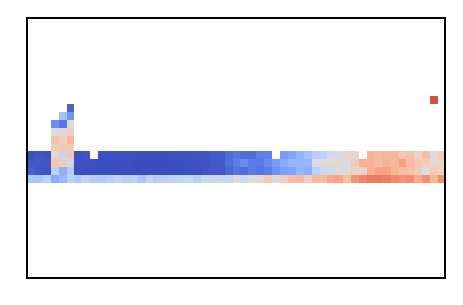

In [ ]:
irrelevance_map = np.full((33, 53), 0.0)
for i in range(20):
  path = f"{BASE}/S{201+i}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  irr  = w[:,:,2]
  s = irr.shape
  irrelevance_map[:s[0], :s[1]] += irr

fig, ax = plt.subplots(figsize=(3,4), dpi=180)
irrelevance_map = irrelevance_map/20
cax=ax.imshow(irrelevance_map, cmap='coolwarm', vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
plt.show()

### Reactiveness Map

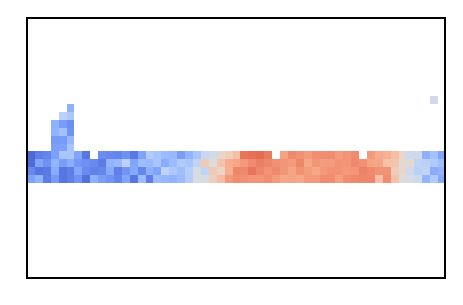

In [ ]:
react_map = np.full((33, 53), 0.0)
for i in range(20):
  path = f"{BASE}/S{201+i}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  react = w[:,:,0] / (w[:,:,0] + w[:,:,1])
  s = react.shape
  react_map[:s[0], :s[1]] += react
fig, ax = plt.subplots(figsize=(3,4), dpi=180)
# ax.set_title(f"{title}(S{201+i})")
react_map /= 20
cax=ax.imshow(react_map, cmap='coolwarm', vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
plt.show()

 Reactiveness map with $w_I$ less than 0.5

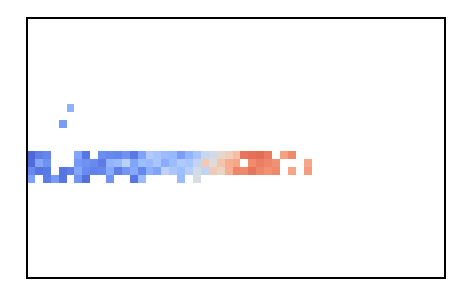

In [ ]:
react_map = np.full((33, 53), 0.0)
for i in range(20):
  path = f"{BASE}/S{201+i}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  react = w[:,:,0] / (w[:,:,0] + w[:,:,1])
  react[w[:,:,2]>0.5] = np.nan
  s = react.shape
  react_map[:s[0], :s[1]] += react
fig, ax = plt.subplots(figsize=(3,4), dpi=180)
# ax.set_title(f"{title}(S{201+i})")
react_map /= 20
react_map[irrelevance_map >0.5] = np.nan
cax=ax.imshow(react_map, cmap='coolwarm', vmin=0, vmax=1)
plt.savefig("DINO_REACTMAP.png")
plt.xticks([])
plt.yticks([])
plt.show()

# Linear Regression

In [ ]:
X = np.vstack((react_K, react_loc, react_scale,
               proact_loc, proact_scale)).T

y = np.array([1232.857, 528, 217.296, 549.615, 1304.428, 567.142, 930.888, 868.444, 1172.25, 636.75, 1133.909091, 851.8, 1948.8, 588.1666667, 679.5454545, 1950.8, 1546, 1639.833333, 2759.2, 949.4444444])

In [ ]:
reg = LinearRegression().fit(X, y)
r_square = reg.score(X, y)
print("score : {}".format(r_square))

score : 0.5223781595729258


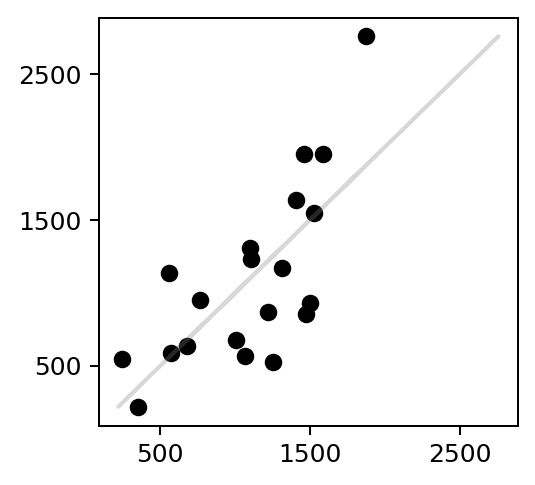

In [ ]:
predicted_scores = (X * reg.coef_).sum(axis=1) + reg.intercept_
fig = plt.figure(figsize=(3, 3),dpi=180)
ax1 = fig.add_subplot(111)
ax1.plot(y, y, color='gray', alpha=0.3)
ax1.scatter(predicted_scores, y, label=f"$R^2:{r_square:.2f}$", color='black')
# ax1.set_xlabel("Predicted Score")
# ax1.set_ylabel("Mean Score")
# plt.legend(loc='lower right')
plt.xticks([500, 1500, 2500])
plt.yticks([500, 1500, 2500])
plt.savefig('study1_dino_linearregression.svg')
plt.show()

In [ ]:
for i in reg.coef_:
  print(f"{i:.2f}")

-2.18
-12140.08
-4314.98
2820.24
-54755.08


In [ ]:
reg.intercept_

11232.646714059198

## Pearson Correlation

In [ ]:
print('reactiveness \t\t', stats.pearsonr(reactiveness, y))
print('proactiveness \t\t', stats.pearsonr(proactiveness, y))
print('react_K \t\t', stats.pearsonr(react_K, y))
print('react_loc* \t\t', stats.pearsonr(react_loc, y))
print('react_scale \t\t', stats.pearsonr(react_scale, y))
print('proact_loc \t\t', stats.pearsonr(proact_loc, y))
print('proact_scale* \t\t', stats.pearsonr(proact_scale, y))

reactiveness 		 (-0.4039098834456993, 0.0773662707241814)
proactiveness 		 (0.4039098834456998, 0.0773662707241811)
react_K 		 (0.10094348156224975, 0.6719670068093063)
react_loc* 		 (-0.37407590485207054, 0.10420010358787443)
react_scale 		 (-0.09416736274258854, 0.6929222608614448)
proact_loc 		 (0.7032458080186367, 0.0005421976151932345)
proact_scale* 		 (-0.01316345360530575, 0.9560744976801521)


# Tabsonic

In [ ]:
VERSION = '21080616'
KEY = 'all'

reactiveness = np.full((20, 2), np.nan)
proactiveness = np.full((20, 2), np.nan)

react_weight = np.full((20, 2), np.nan)
proact_weight = np.full((20, 2), np.nan)
irrelevant_weight = np.full((20, 2), np.nan)

react_K = np.full((20, 2), np.nan)
react_loc = np.full((20, 2), np.nan)
react_scale = np.full((20, 2), np.nan)
react_lambda = np.full((20,2), np.nan)
react_mean = np.full((20,2), np.nan)
proact_loc = np.full((20, 2), np.nan)
proact_scale = np.full((20, 2), np.nan)

dsets=[]

for i in range(20):
  for j, sound in enumerate(['X', 'O']):

      path = f"{BASE}/S{201+i}_{sound}_{KEY}_{VERSION}.hdf5"
      f = h5py.File(path, 'r')

      # weight
      w = f['w'][:] 
      react_weight[i,j] = np.nanmean(w[:,:,0])
      proact_weight[i,j] = np.nanmean(w[:,:,1])
      irrelevant_weight[i,j] = np.nanmean(w[:,:,2])
      reactiveness[i,j] = np.nanmean(w[:,:,0] / (w[:,:,0]+w[:,:,1]))
      proactiveness[i,j] = np.nanmean(w[:,:,1] / (w[:,:,0]+w[:,:,1]))

      # params
      p = f['p'][:]
      react_K[i,j] = np.nanmean(p[:,:,0] )
      react_lambda[i,j] = np.nanmean(1/(p[:,:,0]*p[:,:,2]))
      react_mean[i,j] = np.nanmean(p[:,:,1]+p[:,:,0]*p[:,:,2])
      react_loc[i,j] = np.nanmean(p[:,:,1])
      react_scale[i,j] = np.nanmean(p[:,:,2])
      proact_loc[i,j] = np.nanmean(p[:,:,3])
      proact_scale[i,j] = np.nanmean(p[:,:,4])

      dsets.append(f)

In [ ]:
a = np.vstack((np.arange(1,21),irrelevant_weight[:,1], reactiveness[:,1], react_mean[:,1], react_loc[:,1], proact_scale[:,1])).T
np.savetxt("tasonic1.csv", a, delimiter=",")

a = np.vstack((np.arange(1,21),irrelevant_weight[:,0], reactiveness[:,0], react_mean[:,0], react_loc[:,0], proact_scale[:,0])).T
np.savetxt("tasonic2.csv", a, delimiter=",")

In [ ]:
total_time = [dsets[i]['total_time'] for i in range(len(dsets))]
total_times = [dsets[i]['total_time'][()] for i in range(len(dsets))]
print(f"fitting time for each dataset: {np.mean(total_times)/60}")

In [ ]:
print("WITH SOUND")
print(f"irrelevant_weight {irrelevant_weight[:,1].mean():.3f}, {irrelevant_weight[:,1].std():.3f}")
print(f"reactiveness {reactiveness[:,1].mean():.3f}, {reactiveness[:,1].std():.3f}")
print(f"react_mean {react_mean[:,1].mean():.3f}, {react_mean[:,1].std():.3f}")
print(f"proact_scale {proact_scale[:,1].mean():.3f}, {proact_scale[:,1].std():.3f}")

print("")
print("WITHOUT SOUND")
print(f"irrelevant_weight {irrelevant_weight[:,0].mean():.3f}, {irrelevant_weight[:,0].std():.3f}")
print(f"reactiveness {reactiveness[:,0].mean():.3f}, {reactiveness[:,0].std():.3f}")
print(f"react_mean {react_mean[:,0].mean():.3f}, {react_mean[:,0].std():.3f}")
print(f"proact_scale {proact_scale[:,0].mean():.3f}, {proact_scale[:,0].std():.3f}")

WITH SOUND
irrelevant_weight 0.786, 0.023
reactiveness 0.589, 0.050
react_mean 0.835, 0.199
proact_scale 0.101, 0.016

WITHOUT SOUND
irrelevant_weight 0.783, 0.022
reactiveness 0.578, 0.058
react_mean 0.847, 0.204
proact_scale 0.106, 0.019


### Heatmap

In [ ]:
KEY = 'all'

react_with_sound = np.zeros((33, 53))
react_without_sound = np.zeros((33, 53))
irr = np.zeros((33, 53))

for i in range(20):
  for j, sound in enumerate(['X', 'O']):

      path = f"{BASE}/S{201+i}_{sound}_{KEY}_{VERSION}.hdf5"
      f = h5py.File(path, 'r')

      # weight
      w = f['w'][:] 
      react = w[:,:,0] / (w[:,:,0] + w[:,:,1])
      irr[:w.shape[0], :w.shape[1]] += w[:,:,2]
      
      if sound == 'O':
        react_with_sound[:w.shape[0], :w.shape[1]] += react
      else:
        react_without_sound[:w.shape[0], :w.shape[1]] += react

react_with_sound /= 20
react_without_sound /= 20
irr /= 40

fig, ax = plt.subplots(figsize=(3,4), dpi=180)
title = "best player" if i==18 else "worst player"
ax.set_title(f"with sound")
cax=ax.imshow(react_with_sound, cmap='coolwarm', vmin=0, vmax=1)
cbar=fig.colorbar(cax, ticks=[0, 0.01, 0.5, 0.99, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['','Proactive' ,'', 'Reactive',''])
plt.show()

fig, ax = plt.subplots(figsize=(3,4), dpi=180)
title = "best player" if i==18 else "worst player"
ax.set_title(f"without sound")
cax=ax.imshow(react_without_sound, cmap='coolwarm', vmin=0, vmax=1)
cbar=fig.colorbar(cax, ticks=[0, 0.01, 0.5, 0.99, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['','Proactive' ,'', 'Reactive',''])
plt.show()

fig, ax = plt.subplots(figsize=(3,4), dpi=180)
title = "best player" if i==18 else "worst player"
ax.set_title(f"irrelevant")
cax=ax.imshow(irr, cmap='coolwarm', vmin=0, vmax=1)
fig.colorbar(cax, orientation='horizontal')
plt.show()

In [ ]:
SOUND='O'

react_map = np.full((33, 53), 0.0)
for i in range(20):
  path = f"{BASE}/S{201+i}_{SOUND}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  react = w[:,:,0] / (w[:,:,0] + w[:,:,1])
  s = react.shape
  react_map[:s[0], :s[1]] += react
fig, ax = plt.subplots(figsize=(3,4), dpi=180)
# ax.set_title(f"{title}(S{201+i})")
react_map /= 20
react_map[react_map == 0] = np.nan
cax=ax.imshow(react_map, cmap='coolwarm', vmin=0, vmax=1)
plt.savefig("TABSONIC1_REACTMAP.png")
plt.xticks([])
plt.yticks([])
plt.show()
irrelevance_map = np.full((33, 53), 0.0)

for i in range(20):
  path = f"{BASE}/S{201+i}_{SOUND}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  irr  = w[:,:,2]
  s = irr.shape
  irrelevance_map[:s[0], :s[1]] += irr
fig, ax = plt.subplots(figsize=(3,4), dpi=180)
# ax.set_title(f"{title}(S{201+i})")
irrelevance_map /= 20
irrelevance_map[irrelevance_map==0] = np.nan
cax=ax.imshow(irrelevance_map, cmap='coolwarm', vmin=0, vmax=1)
plt.savefig(f"TABSONIC1_IRRMAP.png")
plt.xticks([])
plt.yticks([])
plt.show()

###
react_map = np.full((33, 53), 0.0)
for i in range(20):
  path = f"{BASE}/S{201+i}_{SOUND}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  react = w[:,:,0] / (w[:,:,0] + w[:,:,1])
  s = react.shape
  react_map[:s[0], :s[1]] += react
fig, ax = plt.subplots(figsize=(3,4), dpi=180)
# ax.set_title(f"{title}(S{201+i})")
react_map /= 20
react_map[react_map == 0] = np.nan
react_map[irrelevance_map>0.5] = np.nan
cax=ax.imshow(react_map, cmap='coolwarm', vmin=0, vmax=1)
plt.savefig("TABSONIC1_REACTMAP05.png")
plt.xticks([])
plt.yticks([])
plt.show()
irrelevance_map = np.full((33, 53), 0.0)


In [ ]:
SOUND='X'

react_map = np.full((33, 53), 0.0)
for i in range(20):
  path = f"{BASE}/S{201+i}_{SOUND}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  react = w[:,:,0] / (w[:,:,0] + w[:,:,1])
  s = react.shape
  react_map[:s[0], :s[1]] += react
fig, ax = plt.subplots(figsize=(3,4), dpi=180)
react_map /= 20
react_map[react_map == 0] = np.nan
cax=ax.imshow(react_map, cmap='coolwarm', vmin=0, vmax=1)
plt.savefig("TABSONIC2_REACTMAP.png")
plt.xticks([])
plt.yticks([])
plt.show()
irrelevance_map = np.full((33, 53), 0.0)

for i in range(20):
  path = f"{BASE}/S{201+i}_{SOUND}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  irr  = w[:,:,2]
  s = irr.shape
  irrelevance_map[:s[0], :s[1]] += irr
fig, ax = plt.subplots(figsize=(3,4), dpi=180)
irrelevance_map /= 20
irrelevance_map[irrelevance_map==0] = np.nan
cax=ax.imshow(irrelevance_map, cmap='coolwarm', vmin=0, vmax=1)
plt.savefig(f"TABSONIC2_IRRMAP.png")
plt.xticks([])
plt.yticks([])
plt.show()

react_map = np.full((33, 53), 0.0)
for i in range(20):
  path = f"{BASE}/S{201+i}_{SOUND}_{KEY}_{VERSION}.hdf5"
  f = h5py.File(path, 'r')

  # weight
  w = f['w'][:] 
  react = w[:,:,0] / (w[:,:,0] + w[:,:,1])
  s = react.shape
  react_map[:s[0], :s[1]] += react
fig, ax = plt.subplots(figsize=(3,4), dpi=180)
react_map /= 20
react_map[react_map == 0] = np.nan
react_map[irrelevance_map > 0.5] = np.nan
cax=ax.imshow(react_map, cmap='coolwarm', vmin=0, vmax=1)
plt.savefig("TABSONIC2_REACTMAP05.png")
plt.xticks([])
plt.yticks([])
plt.show()
irrelevance_map = np.full((33, 53), 0.0)


## Linear Regression

In [ ]:
score_with_sound = \
[379170,333480,334060,262260,406930,\
361240,374380,383020,390460,369800,\
401390,380590,363950,370190,363910,\
361940,388020,377140,395510,406120]

score_without_sound = \
[350480,338350,331770,302600,400010,\
324990,357210,349710,368790,352220,\
397230,346820,376570,360710,357400,\
349190,330040,334950,370340,359880]

#### Without Sound

score : 0.6485487043193396


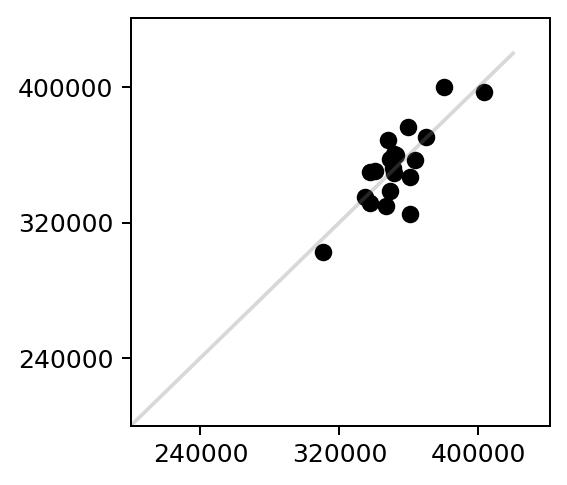

In [ ]:
X = np.vstack((react_K[:,0], react_loc[:,0], react_scale[:,0],
               proact_loc[:,0], proact_scale[:,0])).T
y = score_without_sound
reg = LinearRegression().fit(X, y)
r_square = reg.score(X, y)
print("score : {}".format(r_square))

predicted_scores = (X * reg.coef_).sum(axis=1) + reg.intercept_
fig = plt.figure(figsize=(3, 3),dpi=180)
ax1 = fig.add_subplot(111)
ax1.plot([0, np.max(y)*1.05], [0, np.max(y)*1.05], color='gray', alpha=0.3)
ax1.scatter(predicted_scores, y, label=f"$R^2:{r_square:.2f}$", color='black')
# ax1.set_xlabel("Predicted Score")
# ax1.set_ylabel("Mean Score")
ax1.set_ylim(200000)
ax1.set_xlim(200000)
ax1.set_yticks([240000, 320000, 400000])
ax1.set_xticks([240000, 320000, 400000])
# plt.legend(loc='lower right')
plt.savefig('study1_dino_linearregression.svg')
plt.show()

In [ ]:
reg.coef_

array([  -29094.14885524,   449050.45585272,  5335190.46887094,
        -413940.65227196, -7727457.78570396])

In [ ]:
reg.intercept_

206790.08321447825

#### With Sound

score : 0.6983240758533188


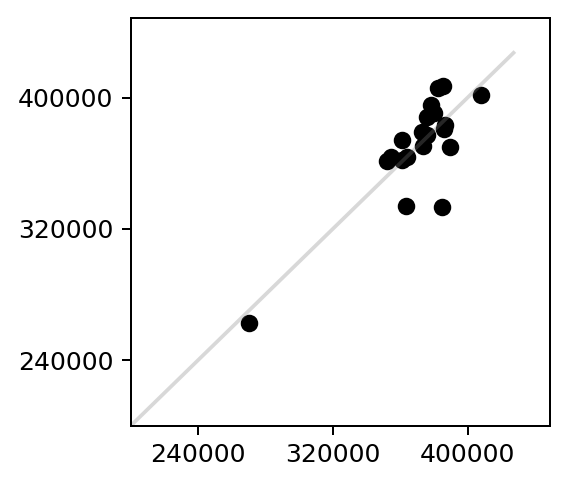

In [ ]:
X = np.vstack((react_K[:,1], react_loc[:,1], react_scale[:,1],
               proact_loc[:,1], proact_scale[:,1])).T
y = score_with_sound
reg = LinearRegression().fit(X, y)
r_square = reg.score(X, y)
print("score : {}".format(r_square))

predicted_scores = (X * reg.coef_).sum(axis=1) + reg.intercept_
fig = plt.figure(figsize=(3, 3),dpi=180)
ax1 = fig.add_subplot(111)
ax1.plot([0, np.max(y)*1.05], [0, np.max(y)*1.05], color='gray', alpha=0.3)
ax1.scatter(predicted_scores, y, label=f"$R^2:{r_square:.2f}$", color='black')
ax1.set_ylim(200000)
ax1.set_xlim(200000)
ax1.set_yticks([240000, 320000, 400000])
ax1.set_xticks([240000, 320000, 400000])
# plt.legend(loc='lower right')
plt.savefig('study1_dino_linearregression.svg')
plt.show()

In [ ]:
reg.coef_

array([  -13883.03722633,   428997.00951958,  4049224.72427321,
          57906.84033062, -6430104.12430658])

In [ ]:
reg.intercept_

302917.108253791

### T-Test

In [ ]:
print("reactiveness \t\t", stats.ttest_rel(reactiveness[:,0], reactiveness[:,1]))
print("proact_weight \t\t", stats.ttest_rel(proactiveness[:,0], proactiveness[:,1]))
print("react_weight \t\t", stats.ttest_rel(react_weight[:,0], react_weight[:,1]))
print("proact_weight \t\t", stats.ttest_rel(proact_weight[:,0], proact_weight[:,1]))
print("irrelevant_weight \t", stats.ttest_rel(irrelevant_weight[:,0], irrelevant_weight[:,1]))
print("react_K \t\t", stats.ttest_rel(react_K[:,0], react_K[:,1]))
print("react_loc \t\t", stats.ttest_rel(react_loc[:,0], react_loc[:,1]))
print("react_sigma \t\t", stats.ttest_rel(react_scale[:,0], react_scale[:,1]))
print("proact_loc \t\t", stats.ttest_rel(proact_loc[:,0], proact_loc[:,1]))
print("proact_scale \t\t", stats.ttest_rel(proact_scale[:,0], proact_scale[:,1]))


reactiveness 		 Ttest_relResult(statistic=0.37966149432432894, pvalue=0.7084070256668313)
proact_weight 		 Ttest_relResult(statistic=-0.3796614943243282, pvalue=0.7084070256668318)
react_weight 		 Ttest_relResult(statistic=0.4499003439251415, pvalue=0.6578731091251602)
proact_weight 		 Ttest_relResult(statistic=-0.13887761474361654, pvalue=0.8910082923093056)
irrelevant_weight 	 Ttest_relResult(statistic=-0.43096630559982557, pvalue=0.671342612170519)
react_K 		 Ttest_relResult(statistic=-0.7245027557381357, pvalue=0.47758482601037666)
react_loc 		 Ttest_relResult(statistic=0.2633287116308602, pvalue=0.795131805107951)
react_sigma 		 Ttest_relResult(statistic=-0.6713430276223524, pvalue=0.510082486703759)
proact_loc 		 Ttest_relResult(statistic=0.42737595745423645, pvalue=0.6739098522525255)
proact_scale 		 Ttest_relResult(statistic=0.7512975545812299, pvalue=0.4616786876521407)


### One-way ANOVA

In [ ]:
print("react_weight \t\t", stats.f_oneway(react_weight[:,0], react_weight[:,1]))
print("proact_weight \t\t", stats.f_oneway(proact_weight[:,0], proact_weight[:,1]))
print("irrelevant_weight \t", stats.f_oneway(irrelevant_weight[:,0], irrelevant_weight[:,1]))
print("react_K \t\t", stats.f_oneway(react_K[:,0], react_K[:,1]))
print("react_loc \t\t", stats.f_oneway(react_loc[:,0], react_loc[:,1]))
print("react_sigma \t\t", stats.f_oneway(react_scale[:,0], react_scale[:,1]))
print("proact_loc \t\t", stats.f_oneway(proact_loc[:,0], proact_loc[:,1]))
print("proact_scale \t\t", stats.f_oneway(proact_scale[:,0], proact_scale[:,1]))

react_weight 		 F_onewayResult(statistic=0.20359662839253517, pvalue=0.6543978526418652)
proact_weight 		 F_onewayResult(statistic=0.011879710982276784, pvalue=0.9137807150202768)
irrelevant_weight 	 F_onewayResult(statistic=0.19120195558940414, pvalue=0.6643932044941273)
react_K 		 F_onewayResult(statistic=0.5912429893931571, pvalue=0.4466918681852291)
react_loc 		 F_onewayResult(statistic=0.07878068740965466, pvalue=0.7804791776477528)
react_sigma 		 F_onewayResult(statistic=0.5583743737563225, pvalue=0.4595150616603978)
proact_loc 		 F_onewayResult(statistic=0.24427035814583015, pvalue=0.6239838475105154)
proact_scale 		 F_onewayResult(statistic=0.545909321460358, pvalue=0.46453347445874127)


### Pearson Correlation

#### Without Sound

In [ ]:
print('reactiveness \t\t', stats.pearsonr(reactiveness[:,0], y))
print('proactiveness \t\t', stats.pearsonr(proactiveness[:,0], y))
print('react_K \t\t', stats.pearsonr(react_K[:,0], y))
print('react_loc \t\t', stats.pearsonr(react_loc[:,0], y))
print('react_scale \t\t', stats.pearsonr(react_scale[:,0], y))
print('proact_loc \t\t', stats.pearsonr(proact_loc[:,0], y))
print('proact_scale \t\t', stats.pearsonr(proact_scale[:,0], y))

reactiveness 		 (0.37608442558054084, 0.1022064751159026)
proactiveness 		 (-0.3760844255805412, 0.10220647511590218)
react_K 		 (-0.016632651903725197, 0.9445133230259347)
react_loc 		 (-0.29171970586549767, 0.21204199359059708)
react_scale 		 (0.3531109953401489, 0.12671982005451754)
proact_loc 		 (-0.27924880416775494, 0.23313244067242453)
proact_scale 		 (-0.15439255768528337, 0.5157433759456519)


#### With Sound

In [ ]:
print('reactiveness \t\t', stats.pearsonr(reactiveness[:,1], y))
print('proactiveness \t\t', stats.pearsonr(proactiveness[:,1], y))
print('react_K* \t\t', stats.pearsonr(react_K[:,1], y))
print('react_loc \t\t', stats.pearsonr(react_loc[:,1], y))
print('react_scale* \t\t', stats.pearsonr(react_scale[:,1], y))
print('proact_loc* \t\t', stats.pearsonr(proact_loc[:,1], y))
print('proact_scale* \t\t', stats.pearsonr(proact_scale[:,1], y))

reactiveness 		 (0.36241992247937976, 0.11632959765442456)
proactiveness 		 (-0.3624199224793797, 0.1163295976544245)
react_K* 		 (-0.16712464768473584, 0.4812728883826179)
react_loc 		 (-0.19655440615649775, 0.40621867094916086)
react_scale* 		 (-0.39121978423846104, 0.0880657079993724)
proact_loc* 		 (0.451516169007354, 0.045673644450471326)
proact_scale* 		 (-0.6937005723907596, 0.0006932217191621974)
